# YOUTUBE - https://www.youtube.com/watch?v=XU5pw3QRYjQ&t=136s

In [ ]:
# conda update --all

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# The datafile' path
pth = 'DATA/Advertising.csv'
df = pd.read_csv(pth,index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Lets check for null, and NaN values
print(df.isnull().sum())
print(df.isna().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [4]:
# Lets see the basic: shape,info(),describe()
print("==================== SHAPE ====================")
print(df.shape)
print("==================== INFO ====================")
print(df.info())
print("================== DESCRIBE ==================")
print(df.describe())
print("==============================================\n")

==================== SHAPE ====================
(200, 4)
==================== INFO ====================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None
================== DESCRIBE ==================
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.60000

<AxesSubplot:xlabel='TV', ylabel='Count'>

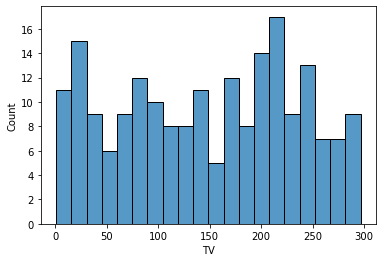

In [6]:
#sns.__version__
sns.histplot(data=df['TV'],bins=20)

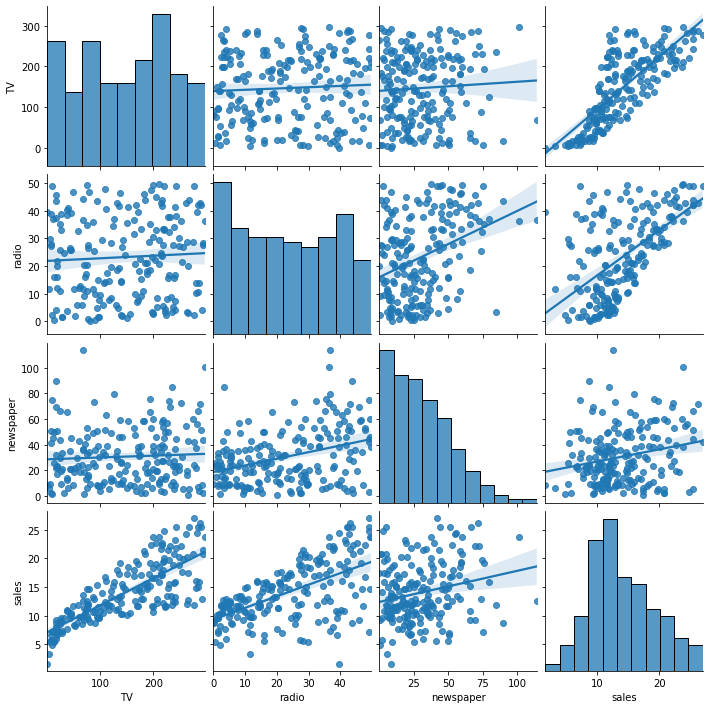

In [7]:
sns.pairplot(data=df,kind='reg')

# Simple linear regression

Text(0, 0.5, 'Sales (K$)')

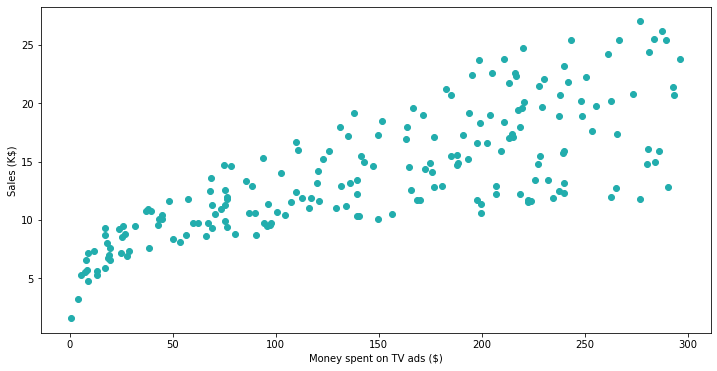

In [12]:
# For first lets see some graphs, to have a short impression about the data
plt.figure(figsize=(12,6))
plt.scatter(df['TV'],df['sales'],c='#22ADAD')
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (K$)')

In [13]:
# Specify our feature(TV spends), and our target(Sales), both as 1 dimensional arrays:
X = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

In [14]:
# Now lets create the model itself, and call fit() on our X, and y:
mdl = LinearRegression()
mdl.fit(X,y)
# Now lest print he equatoin for the lin.reg
print(f"The linear model is\n Y={mdl.intercept_[0]} + {mdl.coef_[0][0]}*TV")

The linear model is
 Y=7.0325935491276965 + 0.047536640433019736*TV


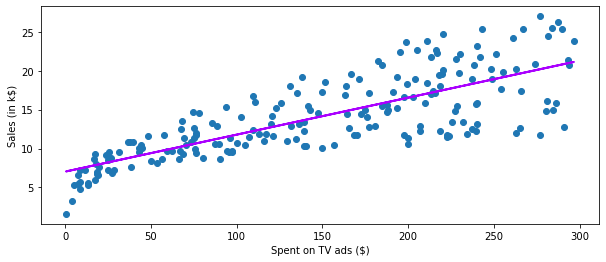

In [21]:
# Now lets see some prediction, to see, how our mmodel predictS.
# For this we have simply add our predicted values as a line to our former graph, and from this
# we easily see the accuracy as the distance of the data points from the line
predictions = mdl.predict(X)
plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.plot(X,predictions,c='#AA00FF',linewidth=2)
plt.xlabel('Spent on TV ads ($)')
plt.ylabel('Sales (in k$)')
plt.show()

In [22]:
# Now lets see some statistical descriptors of the model:
# For this redefine our elemnts to be sure ...
# Then lets create the constant (inependent vrbl)
# Then create an estimator (type OLS oo least square)
# And at the end lets check the summary
X = df['TV']
y = df['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        06:12:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

# MULTIPLE LINEAR REGRESSION

In [23]:
# Now we will use all of the features, and not just TV, for this we have to defin X as a multi-dimensional array.
# The easiest way to achieve this is to drop the 'sales' column:)
Xs = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)
mdl = LinearRegression()
mdl.fit(Xs,y)
print(f"The lin.reg. equation:\n Y = {mdl.intercept_[0]} + {mdl.coef_[0][0]}*TV  + {mdl.coef_[0][1]}*radio + {mdl.coef_[0][2]}*newspaper")

The lin.reg. equation:
 Y = 2.9388893694594085 + 0.04576464545539759*TV  + 0.1885300169182046*radio + -0.0010374930424762452*newspaper


In [24]:
X = np.column_stack((df['TV'],df['radio'],df['newspaper']))
y = df['sales'].values.reshape(-1,1)
exog = sm.add_constant(X)
est = sm.OLS(y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        06:25:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

The most intresting changes are:
- The R-sqared value has gon up to almost 0,9, which mans 90% of the variability is explained by our model
- The F statistic gone down, which shows, the model is reliable
- The P value for newspapers is 0,86 which is a lot higher than 0,05, so this elemnt only disturbs the model, should be thrown away

# CLASSIFICATION